# 1. Problema de Negócio

Identificar o algoritmo que possuí a maior taxa de aprendizado

# 2. Conexão e Análise dos Dados

In [4]:
# Importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing

In [5]:
# Pegando as colunas

col_names = pd.read_csv('dados_filtrados.csv', nrows=0).columns

In [6]:
col_names 

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL0',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB',
       'FONTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE',
       'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN', 'ANO'],
      dtype='object')

In [7]:
colunms_str = ['DTOBITO', 'HORAOBITO', 'DTNASC','LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'DTATESTADO', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'DTRECEBIM',  'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'DTCONCASO']

In [8]:
coluns_int = ['CONTADOR', 'ORIGEM', 'TIPOBITO', 'NATURAL0','IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
             'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
               'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
               'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
               'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
               'NECROPSIA','COMUNSVOIM', 'CIRCOBITO', 'ACIDTRAB','FONTE','TPPOS','ATESTANTE',
               'FONTEINV', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'MORTEPARTO','NUDIASOBIN', 'ANO']

In [9]:
# Importando o dataFrame - todos como str

df = pd.read_csv('dados_filtrados.csv', sep=',', dtype=str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157952 entries, 0 to 157951
Data columns (total 68 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CONTADOR    157952 non-null  object
 1   ORIGEM      157952 non-null  object
 2   TIPOBITO    157952 non-null  object
 3   DTOBITO     157952 non-null  object
 4   HORAOBITO   155198 non-null  object
 5   NATURAL0    129541 non-null  object
 6   DTNASC      157861 non-null  object
 7   IDADE       157952 non-null  object
 8   SEXO        157952 non-null  object
 9   RACACOR     153560 non-null  object
 10  ESTCIV      153950 non-null  object
 11  ESC         149470 non-null  object
 12  OCUP        139942 non-null  object
 13  CODMUNRES   157952 non-null  object
 14  LOCOCOR     157952 non-null  object
 15  CODESTAB    88002 non-null   object
 16  CODMUNOCOR  157952 non-null  object
 17  IDADEMAE    0 non-null       object
 18  ESCMAE      0 non-null       object
 19  SERIESCMAE  0 non-null 

In [11]:
df.isnull().sum()

CONTADOR           0
ORIGEM             0
TIPOBITO           0
DTOBITO            0
HORAOBITO       2754
               ...  
DTCADINF      157952
MORTEPARTO    157952
DTCONCASO     157952
NUDIASOBIN    157950
ANO                0
Length: 68, dtype: int64

In [12]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

CAUSAMAT      100.000000
OCUPMAE       100.000000
OBITOPARTO    100.000000
PARTO         100.000000
GESTACAO      100.000000
SEMAGESTAC    100.000000
GRAVIDEZ      100.000000
QTDFILMORT    100.000000
QTDFILVIVO    100.000000
SERIESCMAE    100.000000
ESCMAE        100.000000
IDADEMAE      100.000000
ESCMAE2010    100.000000
DTCADINF      100.000000
MORTEPARTO    100.000000
DTCONCASO     100.000000
PESO          100.000000
TPOBITOCOR     99.999367
DTCADINV       99.999367
DTCONINV       99.999367
NUDIASOBIN     99.998734
ACIDTRAB       99.782845
TPMORTEOCO     99.755622
OBITOPUERP     99.751190
OBITOGRAV      99.751190
FONTE          99.661923
CIRCOBITO      99.530870
CIRURGIA       99.025653
EXAME          99.008560
COMUNSVOIM     92.550902
DTINVESTIG     87.182815
FONTEINV       86.554776
LINHAII        71.463483
LINHAD         65.916861
CODESTAB       44.285606
TPPOS          33.865985
LINHAC         33.501950
ASSISTMED      28.960064
NECROPSIA      28.816349
NATURAL0       17.987110


- **Contador:** ID ordenado dos registros na tabela - Descartar Coluna
- **Origem:** Banco de dados de Origem da Informação - Descartar Coluna
- **TIPOBITO:** Óbito Fetal - Morte antes do nascimento - Descartar Coluna para o Estudo sobre alzheimer
- **DtObito:** Data em que ocorreu o óbito - Descartar a coluna
- **HORAOBITO:** Hora do óbito - Descartar a coluna
- **Natural0:** País e Unidade de Federação onde o falecido nasceu - 17% de dados faltantes - Int
- **DTNASC:** Data de Nascimento - Descartar a coluna
- **Idade:** Idade do Falecido codificada - Int
- **Sexo:** Sexo do Falecido - Int
- **RacaCor:** Cor informada pelo responsável das informações do falecido - 2% de dados faltantes - Int
- **EstCiv:** Estado Civíl do falecido - 2% de dados faltantes - Int
- **Esc:** Escolaridade em anos - 5% de dados faltantes - Int
- **OCUP:** Tipo de trabalho que o falecido desenvolveu na maior parte da sua vida produtiva - 11% de dados faltantes - Int
- **CodMunRes:** Código do município de residência.
- **LOCOCOR:** Local de ocorrência do óbito - Int
- **CODESTAB:** Código do Estabelecimento - Descartar Coluna
- **CODMUNOCOR:** Código relativo ao município onde ocorreu o óbito - Int
- **IdadeMae:** Idade da mae - 100% de dados faltantes - Descartar coluna
- **ESCMAE:** Escolaridade da mãe - 100% de dados faltantes - Descartar coluna
- **SERIESCMAE:** Última série escolar concluída pela mãe - 100% de dados faltantes - Descartar coluna
- **OCUPMAE:** Tipo de trabalho exercido habitualmente pela Mãe - 100% de dados faltantes - Descartar Coluna
- **QTDFILVIVO:** Número de filhos vivos - 100% de dados faltantes - Descartar Coluna
- **QTDFILMORT:** Número de filhos mortos - 100% de dados faltantes - Descartar Coluna
- **GRAVIDEZ:** Óbito na gravidez - 100% de dados faltantes - Descartar Coluna
- **SEMAGESTAC:** Semanas de gestação - 100% de dados faltantes - Descartar Coluna
- **GESTACAO:** Faixas de semanas de gestação - 100% de dados faltantes - Descartar Coluna
- **PARTO:** Tipo de parto - 100% de dados faltantes - Descartar Coluna
- **OBITOPARTO:** Óbito na gravidez - 100% de dados faltantes - Descartar Coluna
- **PESO:** Peso ao nascer em gramas - 100% de dados faltantes - Descartar Coluna
- **TPMORTEOCO:** Situação gestacional ou pósgestacional em que ocorreu o óbito - 99% de dados faltantes - Descartar Coluna
- **OBITOGRAV:** Óbito na gravidez - 99% de dados faltantes - Descartar Coluna
- **OBITOPUERP:** Óbito no puerpério - 99% de dados faltantes - Descartar Coluna
- **ASSISTMED:** Atendimento médico continuado que o paciente recebeu, ou não, durante a enfermidade que ocasionou o óbito. - 28% de dados faltantes - Int
- **EXAME:** Realização de exame - 99% de dados faltantes - Descartar Coluna
- **CIRURGIA:** Realização de cirurgia - 99% de dados faltantes - Descartar Coluna
- **NECROPSIA:** Refere-se a execução ou não de necropsia para confirmação do diagnóstico - 28% de dados faltantes - Int
- **LINHAA:** Causa terminal - doença ou estado mórbido que causou diretamente a morte - Str
- **LINHAB:** Causa antecedente ou conseqüencial - estado mórbido, se existir, que produziu a causa direta da morte registrada na linha A - Str
- **LINHAC:** Causa antecedente ou conseqüencial - estado mórbido, se existir, que produziu a causa direta da morte registrada na linha A - Str
- **LINHAD:** Causa básica – estado mórbido, se existir, que produziu a causa direta da morte registrada na linha A - Str
- **LINHAII:** Causa contribuinte - outras condições significativas que contribuíram para a morte e que não entraram na cadeia definida na Parte I - Str
- **CAUSABAS:** Causa básica da DO - Str
- **COMUNSVOIM:** Código do município do SVO ou do IML - 92% de dados faltantes - Descartar Coluna
- **DTATESTADO:** Data do Atestado - Descartar Coluna
- **CIRCOBITO:** Tipo de morte violenta ou circunstâncias em que se deu a morte não natural - 99% de dados faltantes - Descartar Coluna
- **ACIDTRAB:** Indica se o evento que desencadeou o óbito está relacionado ao processo de trabalho - 99% de dados faltantes - Descartar Coluna
- **FONTE:** Fonte de informação utilizada para o preenchimento dos campos 48 e 49 - Descartar Coluna
- **TPPOS:** Óbito investigado - 100% de dados faltantes - Descartar Coluna
- **DTINVESTIG:** Data da investigação do óbito - str - Descartar Coluna
- **CAUSABAS_O:** Causa básica informada antes da resseleção - str
- **DTCADASTRO:** Data do cadastro do óbito - Str - Descartar Coluna
- **ATESTANTE:** Indica se o medico que assina atendeu o paciente - 10% de dados faltantes - Int
- **FONTEINV:** Fonte de investigação - 86% de dados faltantes - Descartar Coluna
- **DTRECEBIM:** Data do recebimento - Descartar Coluna
- **CAUSAMAT:** CID da causa externa associada a uma causa materna - 100% de dados faltantes - Descartar Coluna
- **ESC2010:** Escolaridade 2010. Nível da última série concluída pelo falecido - 7% de dados faltantes - Int
- **ESCMAE2010:** Escolaridade 2010. Nível da última série concluída pela mãe - 100% de dados faltantes - Descartar Coluna
- **DIFDATA:** Diferença entre a data de óbito e data do recebimento original da DO - Str - Descartar Coluna
- **STDOEPIDEM:** Status de DO Epidemiológica - Int - Alzheimer não entra como DO epidemiológica - Descartar Coluna
- **STDONOVA:** Status de DO Nova - Int - Controle técnico - Descartar Coluna
- **DTCADINV:** Data do cadastro de investigação - Str
- **TPOBITOCOR:** Momento da ocorrência do óbito - Int - Descartar Coluna
- **DTCONINV:** Data da conclusão da investigação - Str
- **DTCADINF:** Quando preenchido indica se a investigação foi realizada - Str
- **MORTEPARTO:**
- **DTCONCASO:** Data de conclusão do caso - Str - Descartar
- **NUDIASOBIN:** Diferença entre a data óbito e a data conclusão da investigação, em dias - 99% dados faltantes - Descartar Coluna
- **ANO:** Ano que a morte ocorreu - Str

# 3. Processamento de Dados

In [16]:
# 1. Descartar colunas irrelevantes

df.drop(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'DTNASC', 'CODESTAB', 'IDADEMAE', 'ESCMAE', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO',
        'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'EXAME', 'CIRURGIA',
        'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'TPPOS', 'DTINVESTIG', 'DTCADASTRO', 'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESCMAE2010',
        'DIFDATA', 'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN'], axis=1, inplace=True)


In [15]:
# 2. Alterando o dtype dos dados

for cols in col_names:
    if cols not in colunms_str:
        df[cols] = pd.to_numeric(df[cols], errors='coerce').astype('Int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157952 entries, 0 to 157951
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    129541 non-null  Int64 
 1   IDADE       157952 non-null  Int64 
 2   SEXO        157952 non-null  Int64 
 3   RACACOR     153560 non-null  Int64 
 4   ESTCIV      153950 non-null  Int64 
 5   ESC         149470 non-null  Int64 
 6   OCUP        139942 non-null  Int64 
 7   CODMUNRES   157952 non-null  Int64 
 8   LOCOCOR     157952 non-null  Int64 
 9   CODMUNOCOR  157952 non-null  Int64 
 10  ASSISTMED   112209 non-null  Int64 
 11  NECROPSIA   112436 non-null  Int64 
 12  LINHAA      152370 non-null  object
 13  LINHAB      140046 non-null  object
 14  LINHAC      105035 non-null  object
 15  LINHAD      53835 non-null   object
 16  LINHAII     45074 non-null   object
 17  CAUSABAS    157952 non-null  object
 18  CAUSABAS_O  157857 non-null  object
 19  ATESTANTE   141626 non-

In [ ]:
# 3. Tratamento de Dados Faltantes



In [18]:
df.head()

,NATURAL0,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,...,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CAUSABAS_O,ATESTANTE,ESC2010,ANO
0,815,485,1,1,2,5,<NA>,120040,1,120040,...,J189,G309,NaN,NaN,*I10X*J449,G309,G309,5,<NA>,2012
1,823,485,2,1,2,2,<NA>,120040,3,120040,...,I610,I10X,G309,NaN,NaN,I610,R99,5,<NA>,2012
2,812,494,2,<NA>,3,9,<NA>,120040,1,120040,...,J960,I10X,I500,G309,NaN,I10,I10,2,<NA>,2012
3,823,485,2,1,2,1,<NA>,120040,3,120040,...,G309,I509,NaN,NaN,*N19X,G309,G309,2,<NA>,2012
4,812,489,2,1,2,2,<NA>,120040,3,120040,...,R688,E149,J449,G309,*I694*E46,E149,E149,5,<NA>,2012


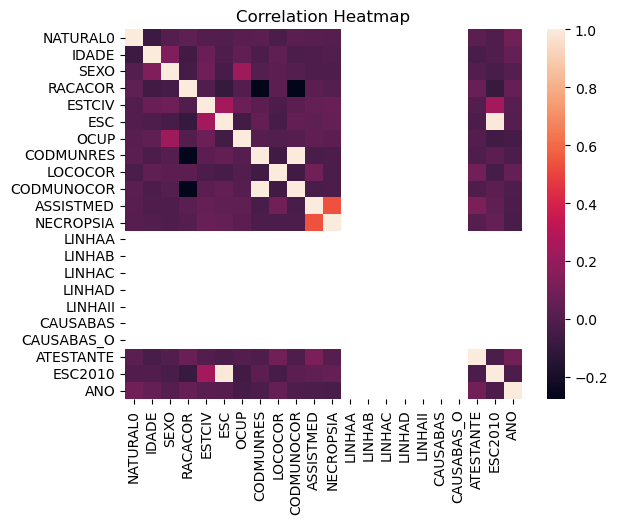

In [19]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df_cleaned.corr()

sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
target_columns = ['NATURAL0', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP', 'LOCOCOR', 'ASSISTMED', 'NECROPSIA', 'LINHAA','LINHAB','LINHAC','LINHAD','LINHAII','CAUSABAS','DIFDATA','CAUSABAS_O']

numeric_columns = df[target_columns].select_dtypes(include=['number']).columns

# Compute and plot the heatmap for numeric columns
sns.heatmap(df[numeric_columns].corr())
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

KeyError: "['DIFDATA'] not in index"

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
df_cleaned = df.copy()[target_columns]
non_numeric_columns = df_cleaned.select_dtypes(exclude=['number']).columns
label_encoders = {}

for column in non_numeric_columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str))
    label_encoders[column] = le

sns.heatmap(df_cleaned.corr())


# Limpando os 40%+ nulos

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]
df.head()

In [ ]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df_cleaned.corr())

# Mapa Som

In [ ]:
from minisom import MiniSom
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_cleaned.head()

In [ ]:
data_sus_normalized = MinMaxScaler().fit_transform(df_cleaned)